In [9]:

import numpy as np
import pandas as pd
import seaborn as sns

https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48

# Simple Numeric example

## 1 Step example

In [2]:
# Current Estimate = est_t
# Previous Estimate = est_t_m1
# Error in Current Estimate (or Intial_Estimate_Error) = E_est_t
# Error in Previous Estimate = E_est_t_m1
# Error in Measurement = E_meas

#  = E_est_t

True_Temperature = 72
Inital_Estimate = 68
Intial_Estimate_Error = 2

Initial_Measurement = 75
Initial_Measurement_Error = 4

In [41]:
### STEP 1
est_t_m1 = Inital_Estimate
E_est_t_m1 = Intial_Estimate_Error
E_est_t = Intial_Estimate_Error
E_meas = Initial_Measurement_Error
meas = Initial_Measurement

# 1 Kalman Gain
KG = E_est_t / (E_est_t + E_meas)
print('Kalman_Gain (t)= ', KG)

# 2 Current Estimate
est_t = est_t_m1 + KG*(meas - est_t_m1)
print('Kalman_Gain (t)= ', est_t)

# 3 Updated Estimate Error
E_est_t = (1 - KG)*E_est_t_m1
print('Updated Estimate Error (t)= ',E_est_t)

Kalman_Gain (t)=  0.3333333333333333
Kalman_Gain (t)=  70.33333333333333
Updated Estimate Error (t)=  1.3333333333333335


## Multiple Steps Example



In [ ]:
| time | Measurement (meas) |
| t-1  |                    |
|  t   |         75         |
| t+1  |         71         |
| t+2  |         70         |
| t+3  |         74         |

In [42]:
## STEP t + 1

# Set up time step m1 from previous estimates
est_t_m1 = est_t
meas = 71
E_est_t_m1 = E_est_t

# 1 Kalman Gain
KG = E_est_t / (E_est_t + E_meas)
print('Kalman_Gain (t+1)= ', KG)

# 2 Current Estimate
est_t = est_t_m1 + KG*(meas - est_t_m1)
print('Kalman_Gain (t+1)= ', est_t)

# 3 Updated Estimate Error
E_est_t = (1 - KG)*E_est_t_m1
print('Updated Estimate Error (t+1)= ',E_est_t)

Kalman_Gain (t+1)=  0.25
Kalman_Gain (t+1)=  70.5
Updated Estimate Error (t+1)=  1.0


In [43]:
## STEP t + 2

# Set up time step m1 from previous estimates
est_t_m1 = est_t
meas = 70
E_est_t_m1 = E_est_t

# 1 Kalman Gain
KG = E_est_t / (E_est_t + E_meas)
print('Kalman_Gain (t+2)= ', KG)

# 2 Current Estimate
est_t = est_t_m1 + KG*(meas - est_t_m1)
print('Kalman_Gain (t+2)= ', est_t)

# 3 Updated Estimate Error
E_est_t = (1 - KG)*E_est_t_m1
print('Updated Estimate Error (t+2)= ',E_est_t)

Kalman_Gain (t+2)=  0.2
Kalman_Gain (t+2)=  70.4
Updated Estimate Error (t+2)=  0.8


In [44]:
## STEP t + 3

# Set up time step m1 from previous estimates
est_t_m1 = est_t
meas = 74
E_est_t_m1 = E_est_t

# 1 Kalman Gain
KG = E_est_t / (E_est_t + E_meas)
print('Kalman_Gain (t+3)= ', KG)

# 2 Current Estimate
est_t = est_t_m1 + KG*(meas - est_t_m1)
print('Kalman_Gain (t+3)= ', est_t)

# 3 Updated Estimate Error
E_est_t = (1 - KG)*E_est_t_m1
print('Updated Estimate Error (t+3)= ',E_est_t)

Kalman_Gain (t+3)=  0.16666666666666669
Kalman_Gain (t+3)=  71.0
Updated Estimate Error (t+3)=  0.6666666666666666


# Graphical Example

In [ ]:
| time | Measurement (meas) | E_meas |  est  | est_t_m1 |  KG  | est_t |
| t-1  |                    |        |   68  |     2    |      |       |
|  t   |         75         |   4    | 70.33 |          | 0.33 |  1.33 |
| t+1  |         71         |   4    | 70.50 |          | 0.25 |  1.00 |
| t+2  |         70         |   4    | 70.40 |          | 0.20 |  0.80 |
| t+3  |         74         |   4    |   71  |          | 0.17 |       |

In [ ]:
t = [1,2,3,4,5]
# Current Estimate = est_t
# Previous Estimate = est_t_m1
# Error in Current Estimate (or Intial_Estimate_Error) = E_est_t
# Error in Previous Estimate = E_est_t_m1
# Error in Measurement = E_meas

Inital_Estimate = 68
Intial_Estimate_Error = 2

Initial_Measurement = 75
Initial_Measurement_Error = 4

df = pd.DataFrame

   time  Measurements  Kalman Gain  Estimates  Error in estimates
0     1            75     0.333333  68.000000            2.000000
1     2            71     0.250000  70.333333            1.333333
2     3            70     0.200000  70.500000            1.000000
3     4            74     0.166667  70.400000            0.800000
4     5            75     0.142857  71.000000            0.666667
5     6            78     0.125000  71.571429            0.571429
6     7            70     0.111111  72.375000            0.500000


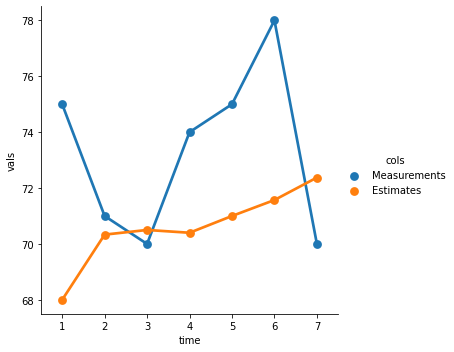

In [31]:

time = [1,2,3,4,5,6,7]  # just a vector of time steps (measurements)
Measurement_list = [75, 71, 70, 74,75, 78, 70]   # This is the list of 'slightly inaccurate' measurements we can

est_t = 68   #  First value here is the inital estimate not derived from the measurement
E_est_t = 2  #  First value is the inital estimate or error not derived from the measurement
E_meas = 4   # Error in the measurement process (this usually stays constance and the way we take measurements is the same)
KG_list = []
est_t_list = [est_t]
E_est_t_list = [E_est_t]
for timestep in range(0,len(Measurement_list)):
    # 1 Kalman Gain
    KG = E_est_t / (E_est_t+ E_meas)
    KG_list.append(KG)

    # 2 Current Estimate
    est_t = est_t + KG*(Measurement_list[timestep] - est_t)
    est_t_list.append(est_t)

    # 3 Updated Estimate Error
    E_est_t = (1 - KG)*E_est_t
    E_est_t_list.append(E_est_t)


df = pd.DataFrame(list(zip(time, Measurement_list, KG_list, est_t_list, E_est_t_list)),
               columns =['time', 'Measurements', 'Kalman Gain', 'Estimates', 'Error in estimates'])


print(df)

# Melt df to plot using seaborn 
dfm = df[['time','Measurements', 'Estimates']].melt('time', var_name='cols', value_name='vals')
sns.catplot(x="time", y="vals", hue='cols', data=dfm, kind='point')

In [1]:
def updated_mean(mean1, var1, mean2, var2):
    new_mean = (mean1 * var2 + mean2 * var1) / (var1 + var2)
    return new_mean

def updated_var(var1, var2):
    new_var = 1 / ((1 / var1) + (1 / var2))
    return new_var

In [ ]:

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

In [5]:
import numpy as np
from numpy.linalg import inv

x_observations = np.array([4000, 4260, 4550, 4860, 5110])
v_observations = np.array([280, 282, 285, 286, 290])

z = np.c_[x_observations, v_observations]
print(z)
# Initial Conditions
a = 2  # Acceleration
v = 280
t = 1  # Difference in time

# Process / Estimation Errors
error_est_x = 20
error_est_v = 5

# Observation Errors
error_obs_x = 25  # Uncertainty in the measurement
error_obs_v = 6



[[4000  280]
 [4260  282]
 [4550  285]
 [4860  286]
 [5110  290]]


In [ ]:
def prediction2d(x, v, t, a):
    A = np.array([[1, t],
                  [0, 1]])         # Update previous state based on the time that has elapsed
    X = np.array([[x],
                  [v]])
    B = np.array([[0.5 * t ** 2],    
                  [t]])            # translates acceleration into an adjustment to the position and velocity
    X_prime = A.dot(X) + B.dot(a)
    return X_prime

##  updated the Process / Estimation Covariance matrix to the next time step, predicting it forward. 
#   The operation adds a time step to the matrix, subsequently updating the variance of the distance error. 
#   The A matrix is similar to the one used in predicting the State matrix values. Since Professor Biezen eliminated the off-diagonal values, I did the same.
def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))

In [7]:
# Initial Estimation Covariance Matrix
P = covariance2d(error_est_x, error_est_v)
A = np.array([[1, t],
              [0, 1]])
print(A)

# Initial State Matrix
X = np.array([[z[0][0]],
              [v]])
n = len(z[0])
print(X)

[[1 1]
 [0 1]]
[[4000]
 [ 280]]


In [4]:







for data in z[1:]:
    X = prediction2d(X[0][0], X[1][0], t, a)
    # To simplify the problem, professor
    # set off-diagonal terms to 0.
    P = np.diag(np.diag(A.dot(P).dot(A.T)))

    # Calculating the Kalman Gain
    H = np.identity(n)
    R = covariance2d(error_obs_x, error_obs_v)
    S = H.dot(P).dot(H.T) + R
    K = P.dot(H).dot(inv(S))

    # Reshape the new data into the measurement space.
    Y = H.dot(data).reshape(n, -1)

    # Update the State Matrix
    # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
    X = X + K.dot(Y - H.dot(X))

    # Update Process Covariance Matrix
    P = (np.identity(len(K)) - K.dot(H)).dot(P)

print("Kalman Filter State Matrix:\n", X)



Kalman Filter State Matrix:
 [[5127.05898493]
 [ 288.55147059]]
